### Importing Necessary Libraries and Functions

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms


import numpy as np
import matplotlib.pyplot as plt

### Device selection if availabe GPU else CPU

In [2]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print('GPU selected for computations')
else:
  device = torch.device("cpu")
  print('CPU selected for computations')

CPU selected for computations


### CIFAR-10 Dateset Loading and DataLoader Creatiion with batchsize=500

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
batch_size = 500
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
classes = 10
lr = 0.001

### Network for CIFAR10 with following Architechture
The Network architecture is changed with permisssion from **TA Mr.Debanjan**. This is done as to improve the testing accuracy of the model. *Baseline requirement of one extra Conv,ReLU,MaxPool are satisfied.*
Highest Testing Accuracy of **76** is acheievd with this network when trained for 20 epochs. Changes were made in accordance to the size of the image.


---


- Conv2D 5x5 32
- ReLU
- BatchNorm2D

- Conv2D 3x3 32
- ReLU
- BatchNorm2D

- Conv2D 3x3 32
- ReLU
- BatchNorm2D

- MaxPool2D 32

- Conv2D 5x5 64
- ReLU
- BatchNorm2D

- Conv2D 3x3 64
- ReLU
- BatchNorm2D

- Conv2D 3x3 64
- ReLU
- BatchNorm2D

- Flatten

- Linear 256

- Linear 128

- Linear 10 



In [5]:
class CIFAR10NET(nn.Module):
    def __init__(self):
        super(CIFAR10NET, self).__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=32),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=64)
            #nn.MaxPool2d(kernel_size=2,stride=2)
        )
        
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(4*4*64,512)
        self.fc2 = nn.Linear(512,128)
        self.fc3 = nn.Linear(128,10)
        

    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [6]:
model = CIFAR10NET().to(device)
print(model)

CIFAR10NET(
  (block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 64, kernel_si

### Defining Loss function and Optimizer

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=lr)

### Training Loop

In [8]:
epochs = 40
loss_list =[]
acc_list =[]
for epoch in range(epochs):
    total_correct = 0
    total_loss = 0 
    for images,labels in iter(trainloader):
        images = images.to(device)
        labels = labels.to(device)

        preds = model(images)
        loss = criterion(preds,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_correct += preds.argmax(dim=1).eq(labels).sum().item()
        total_loss += loss.item()
    loss_list.append(total_loss/batch_size)
    acc_list.append(total_correct/500)
    print("Epoch [%d/%d] Total Correct [%d/50000] Total loss : %.4f"%(epoch+1,epochs,total_correct,total_loss))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/40] Total Correct [24492/50000] Total loss : 139.6543
Epoch [2/40] Total Correct [32113/50000] Total loss : 100.3802
Epoch [3/40] Total Correct [35328/50000] Total loss : 83.6240
Epoch [4/40] Total Correct [37463/50000] Total loss : 71.5260
Epoch [5/40] Total Correct [38731/50000] Total loss : 63.8104
Epoch [6/40] Total Correct [40120/50000] Total loss : 56.3710
Epoch [7/40] Total Correct [41049/50000] Total loss : 50.9003
Epoch [8/40] Total Correct [41947/50000] Total loss : 45.2419
Epoch [9/40] Total Correct [42873/50000] Total loss : 40.0951
Epoch [10/40] Total Correct [43643/50000] Total loss : 35.3525
Epoch [11/40] Total Correct [44529/50000] Total loss : 30.5856
Epoch [12/40] Total Correct [45022/50000] Total loss : 27.5415
Epoch [13/40] Total Correct [45703/50000] Total loss : 24.0378
Epoch [14/40] Total Correct [46099/50000] Total loss : 21.6797
Epoch [15/40] Total Correct [46510/50000] Total loss : 19.3151
Epoch [16/40] Total Correct [46967/50000] Total loss : 16.7741

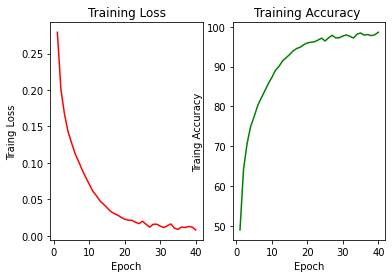

In [11]:
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),loss_list,'r')
plt.ylabel('Traing Loss')
plt.xlabel('Epoch')
plt.title('Training Loss')
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),acc_list,'g')
plt.ylabel('Traing Accuracy')
plt.xlabel('Epoch')
plt.title('Training Accuracy ')
#lt.show()
plt.savefig('A2_CIFAR10_TRAIN.PNG')

### Testing 

In [10]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        preds = model(images)
        correct += preds.argmax(dim=1).eq(labels).sum().item()

    print("Model accuracy on %d test images is : %.3f"%(batch_size*len(testloader),100*correct/(batch_size*len(testloader))))


Model accuracy on 10000 test images is : 71.110
